In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **Exploratory Data Analysis (EDA)**

In [262]:
df = pd.read_excel('churn.xlsx')

In [263]:
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
5408,2284-VFLKH,1,United States,California,Clipper Mills,95930,"39.562239, -121.14836",39.562239,-121.148360,Male,...,One year,Yes,Credit card (automatic),99.25,4920.8,No,0,43,4995,NaN
6636,1150-FTQGN,1,United States,California,Oregon House,95962,"39.342587, -121.249833",39.342587,-121.249833,Female,...,One year,No,Bank transfer (automatic),94.15,5811.8,No,0,60,6399,NaN
2401,3347-YJZZE,1,United States,California,Los Osos,93402,"35.279984, -120.824288",35.279984,-120.824288,Male,...,Month-to-month,No,Credit card (automatic),80.10,2211.8,No,0,70,4558,NaN
4189,2452-SNHFZ,1,United States,California,Elk Creek,95939,"39.53222, -122.594879",39.532220,-122.594879,Female,...,Month-to-month,No,Credit card (automatic),75.45,3545.1,No,0,66,4995,NaN
6337,6096-EGVTU,1,United States,California,San Jose,95120,"37.186141, -121.843554",37.186141,-121.843554,Female,...,One year,No,Mailed check,24.90,1595.5,No,0,62,5038,NaN
4696,1080-BWSYE,1,United States,California,Irvine,92618,"33.667145, -117.732135",33.667145,-117.732135,Male,...,Two year,No,Credit card (automatic),25.65,1740.8,No,0,36,6469,NaN
983,4806-HIPDW,1,United States,California,Calimesa,92320,"33.982787, -117.057627",33.982787,-117.057627,Female,...,Month-to-month,Yes,Electronic check,68.95,68.95,Yes,1,75,5644,Limited range of services
4573,0795-GMVQO,1,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,Male,...,One year,No,Credit card (automatic),109.90,7332.4,No,0,26,5416,NaN
3555,9339-FIIJL,1,United States,California,Avenal,93204,"35.916943, -120.129921",35.916943,-120.129921,Male,...,Two year,No,Bank transfer (automatic),85.95,6151.9,No,0,62,6450,NaN
5121,1307-ATKGB,1,United States,California,Santa Clara,95054,"37.393554, -121.965114",37.393554,-121.965114,Male,...,Month-to-month,Yes,Electronic check,89.55,2187.15,No,0,41,2007,NaN


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [265]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [266]:
# Categorical feature frequency distributions
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for CustomerID:
CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts for Country:
Country
United States    7043
Name: count, dtype: int64

Value counts for State:
State
California    7043
Name: count, dtype: int64

Value counts for City:
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

Value counts for Lat Long:
Lat Long
33.964131, -118.272783    5
34.152875, -118.486056    5
32.912664, -116.635387    5
32.64164, -116.985026     5
32.607964, -117.059459    5
                         ..
37.4695, -120.672724      4
38.055562, -120.456298    4
38.244806, -

In [267]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Churn Reason    5174
dtype: int64


In [268]:
# Data types of columns
print(df.dtypes)


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


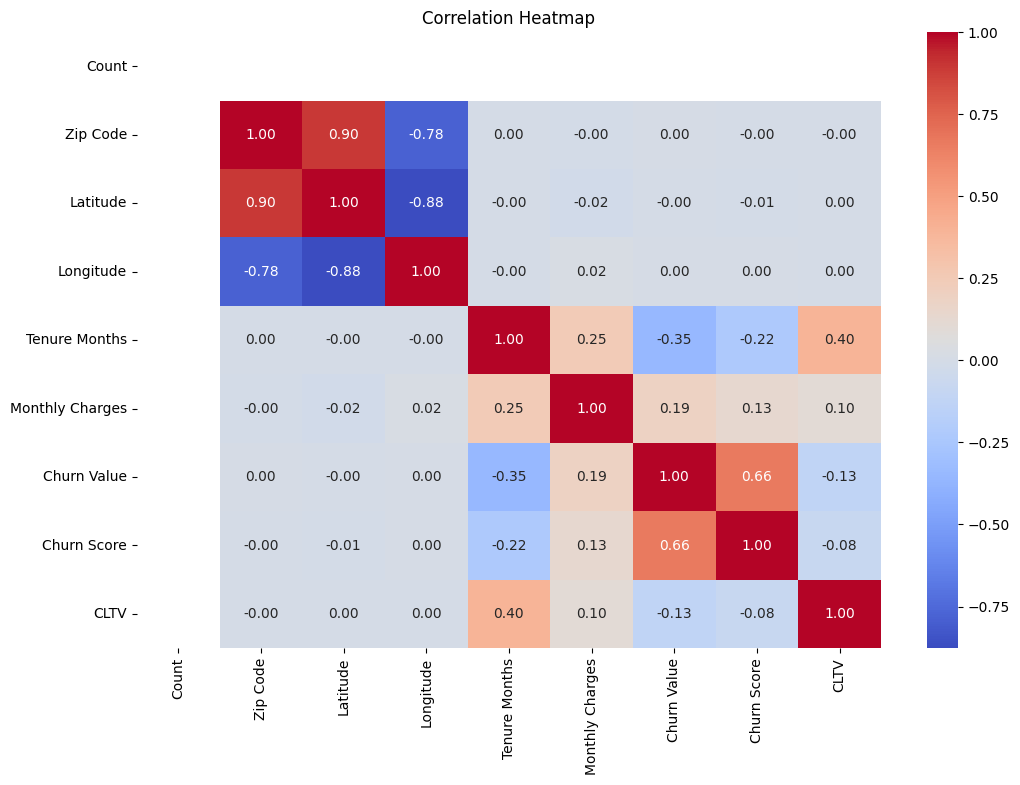

In [269]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# **Data Cleaning**

In [270]:
# Dropping irrelevant columns

df = df[['Zip Code','Gender','Senior Citizen','Partner','Dependents','Tenure Months',
         'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup',
         'Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract',
         'Paperless Billing','Payment Method','Monthly Charges','Total Charges',
         'Churn Value','Churn Score','CLTV']].copy()

# Converting categorical data to numerical
le = LabelEncoder()

categorical_df = df.select_dtypes(include=[object])
for i in categorical_df.columns:
    df[i]=df[i].astype('string')
    df[i]=le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip Code           7043 non-null   int64  
 1   Gender             7043 non-null   int64  
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   int64  
 4   Dependents         7043 non-null   int64  
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   int64  
 7   Multiple Lines     7043 non-null   int64  
 8   Internet Service   7043 non-null   int64  
 9   Online Security    7043 non-null   int64  
 10  Online Backup      7043 non-null   int64  
 11  Device Protection  7043 non-null   int64  
 12  Tech Support       7043 non-null   int64  
 13  Streaming TV       7043 non-null   int64  
 14  Streaming Movies   7043 non-null   int64  
 15  Contract           7043 non-null   int64  
 16  Paperless Billing  7043 

# **Feature Engineering**

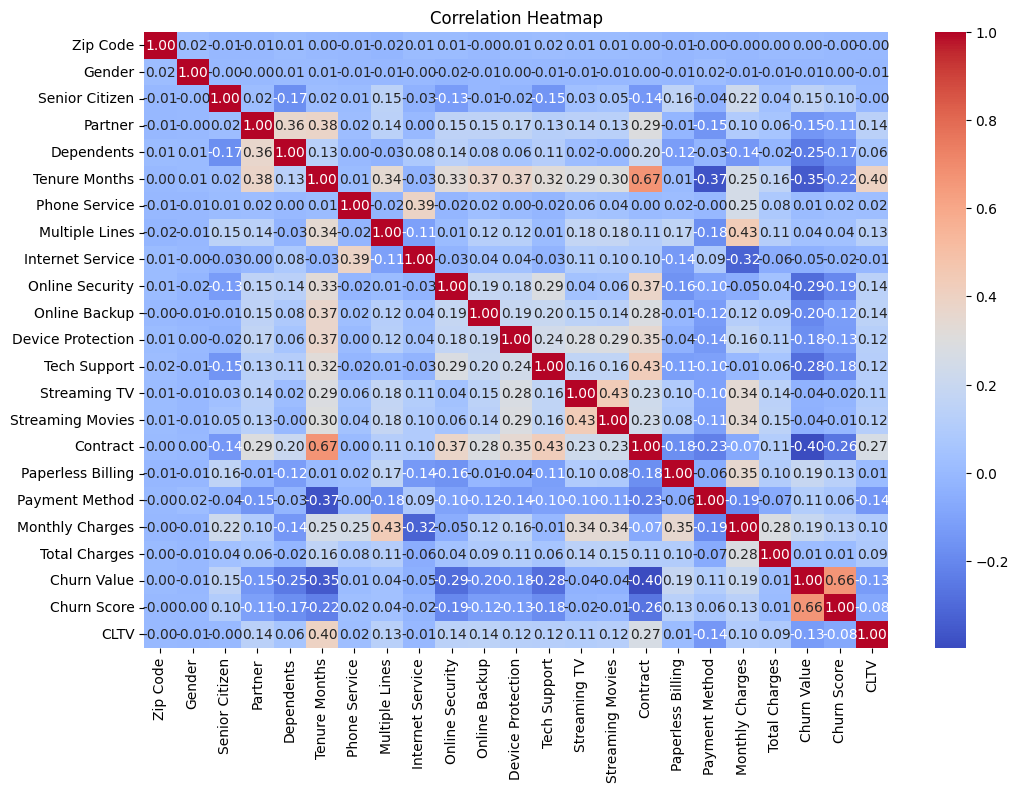

In [271]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

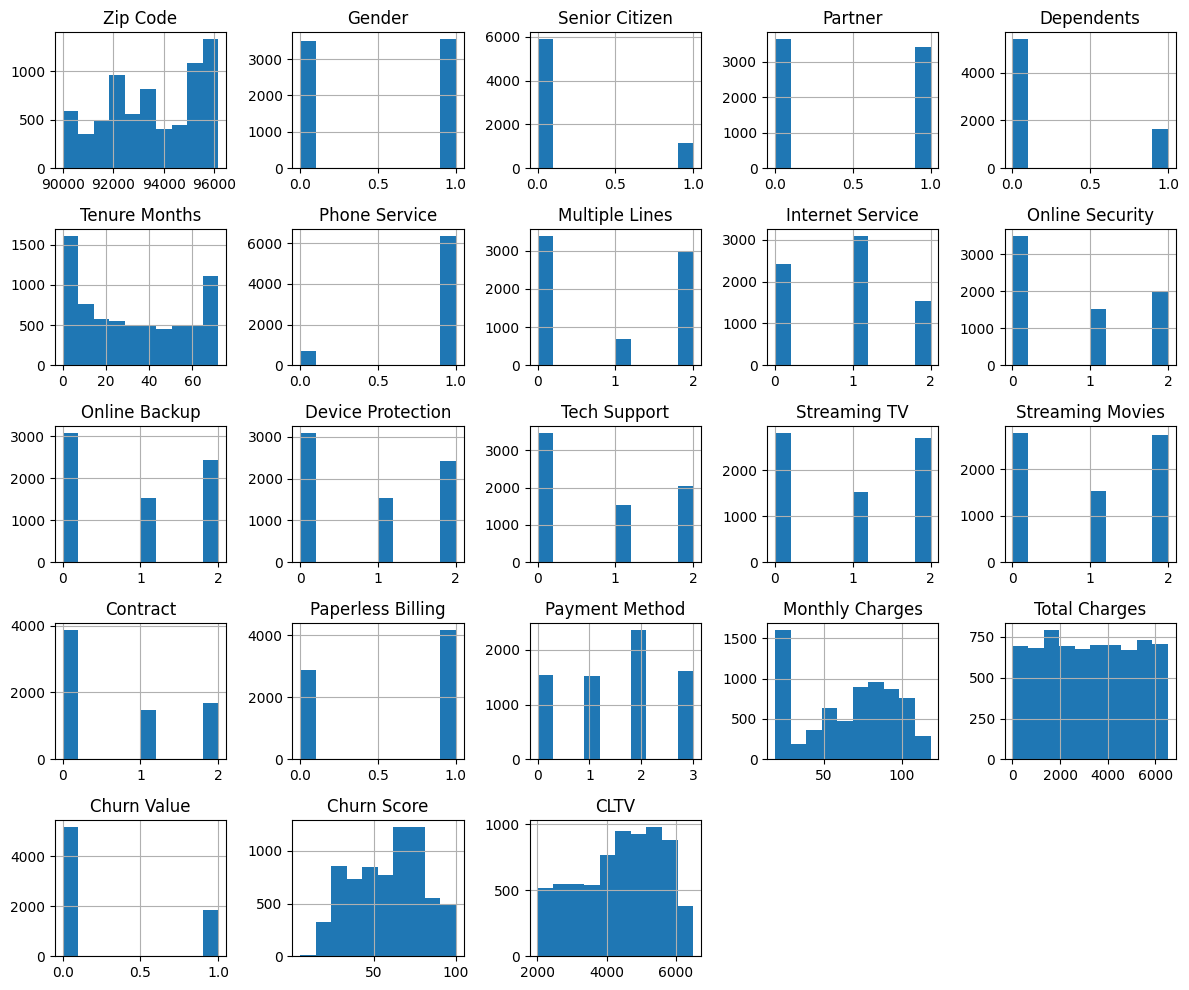

In [272]:
# Plot distributions of numerical features to determine scaling needs
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



In [273]:
# Scaling values

scaler = StandardScaler()

df[['Zip Code','Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']] = scaler.fit_transform(df[['Zip Code','Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']])

In [274]:
df.describe()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000,7.043000e+03,7.043000e+03
mean,2.292138e-15,0.504756,0.162147,0.483033,0.231010,-1.614182e-17,0.903166,0.940508,0.872923,0.790004,...,0.985376,0.992475,0.690473,0.592219,1.574329,-5.649637e-17,2.824818e-17,0.265370,1.291346e-16,-2.824818e-16
std,1.000071e+00,0.500013,0.368612,0.499748,0.421508,1.000071e+00,0.295752,0.948554,0.737796,0.859848,...,0.885002,0.885091,0.833755,0.491457,1.068104,1.000071e+00,1.000071e+00,0.441561,1.000071e+00,1.000071e+00
min,-1.887247e+00,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,-1.725015e+00,0.000000,-2.494908e+00,-2.026501e+00
25%,-7.611049e-01,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-9.725399e-01,-8.730433e-01,0.000000,-8.687866e-01,-7.872501e-01
50%,1.609903e-02,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,1.857327e-01,-4.656524e-03,0.000000,1.068865e-01,1.071066e-01
75%,9.803680e-01,1.000000,0.000000,1.000000,0.000000,9.214551e-01,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,8.338335e-01,8.703490e-01,1.000000,7.573352e-01,8.285938e-01
max,1.414530e+00,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,1.794352e+00,1.732647e+00,1.000000,1.918851e+00,1.774938e+00


# **Model Comparison**

In [275]:
# Define features and target
X = df.drop('Churn Value', axis=1)  # Features
y = df['Churn Value']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [276]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.907735982966643
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1009
           1       0.84      0.84      0.84       400

    accuracy                           0.91      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409

Confusion Matrix:
 [[943  66]
 [ 64 336]]


In [277]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9261887863733144
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.90      0.84      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Confusion Matrix:
 [[970  39]
 [ 65 335]]


In [278]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9190915542938254
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1009
           1       0.86      0.85      0.86       400

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Confusion Matrix:
 [[954  55]
 [ 59 341]]


# **Model Validation**

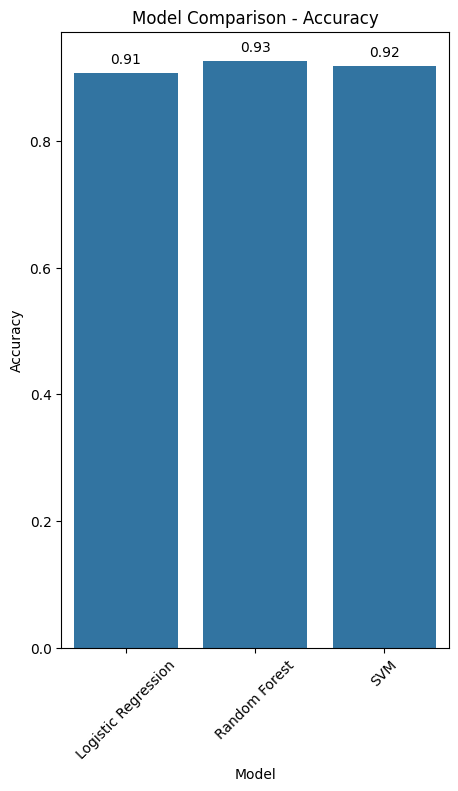

In [279]:
# Define model names and metrics
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]

# Plot accuracy scores
plt.figure(figsize=(5, 8))
bars = plt.bar(models, accuracies, color='lightblue')

sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')


plt.show()


In [280]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Metric to optimize
)

grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [281]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print performance metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9332637773620531
Test Accuracy: 0.9276082327892122
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1009
           1       0.88      0.86      0.87       400

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



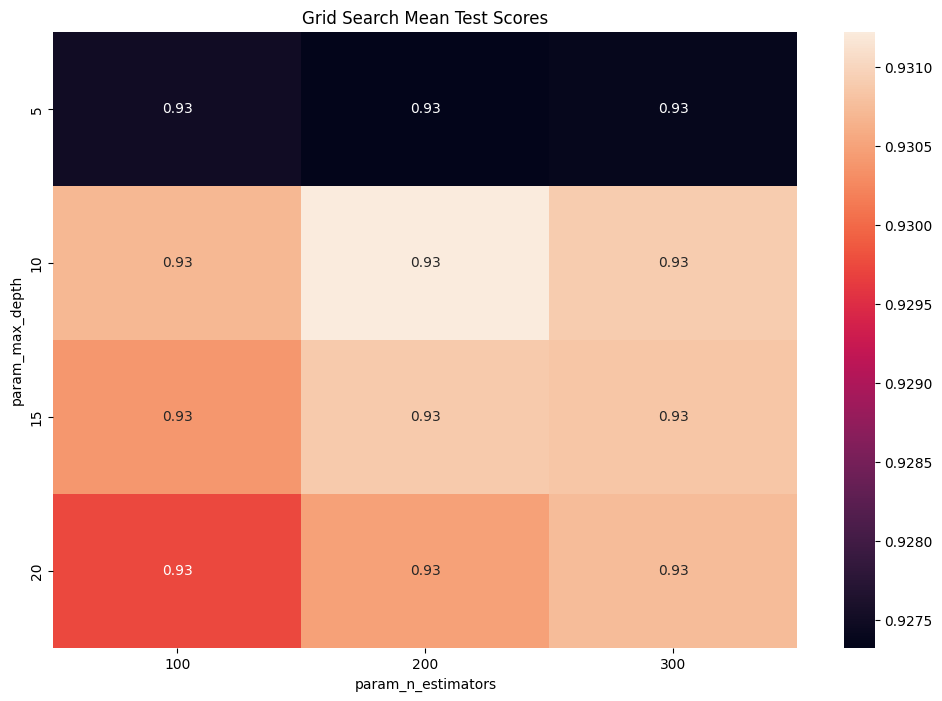

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert GridSearchCV results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot a heatmap of scores
plt.figure(figsize=(12, 8))
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True)
plt.title('Grid Search Mean Test Scores')
plt.show()



In [284]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Metric to optimize
)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [285]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print performance metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
Best Cross-Validation Score: 0.9321977427931556
Test Accuracy: 0.9276082327892122
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.88      0.86      0.87       400

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



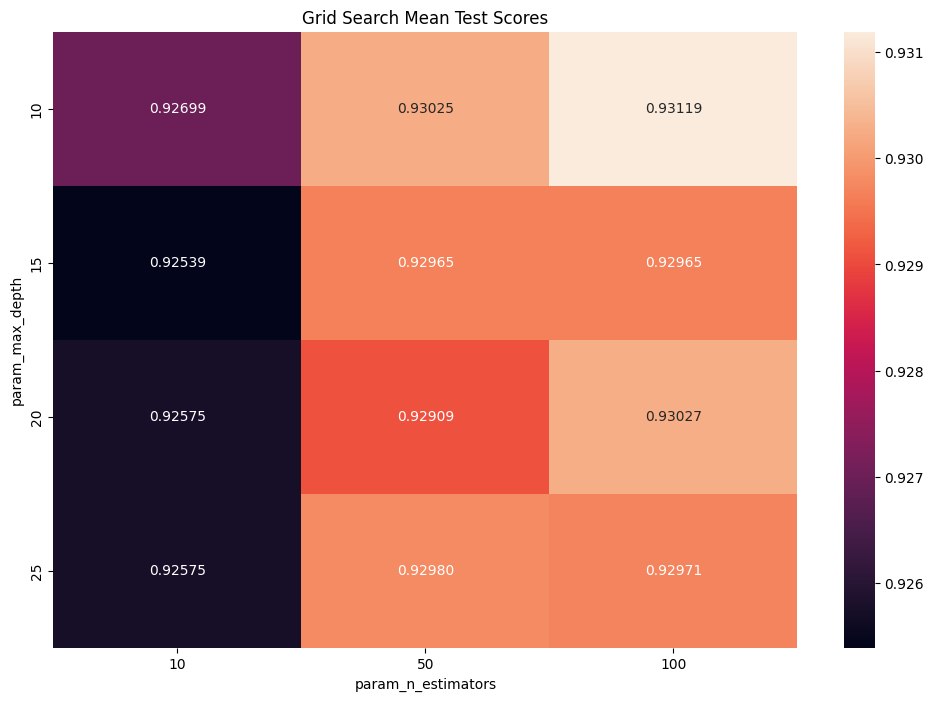

In [292]:
# Convert GridSearchCV results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot a heatmap of scores
plt.figure(figsize=(12, 8))
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, fmt=".5f")
plt.title('Grid Search Mean Test Scores')
plt.show()

# **Final Model**

In [296]:
# Extract the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Example new data entry
new_data = pd.DataFrame({
    'Zip Code': [92320],
    'Gender': [1],
    'Senior Citizen': [0],
    'Partner': [1],
    'Dependents': [0],
    'Tenure Months': [12],
    'Phone Service': [1],
    'Multiple Lines': [0],
    'Internet Service': [2],
    'Online Security': [1],
    'Online Backup': [0],
    'Device Protection': [1],
    'Tech Support': [1],
    'Streaming TV': [0],
    'Streaming Movies': [0],
    'Contract': [2],
    'Paperless Billing': [1],
    'Payment Method': [0],
    'Monthly Charges': [70.0],
    'Total Charges': [800.0],
    'Churn Score': [45],
    'CLTV': [4000]
})

new_data[['Zip Code','Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']] = scaler.fit_transform(new_data[['Zip Code','Tenure Months','Monthly Charges','Total Charges','Churn Score','CLTV']])

# Predict using the final model
prediction = best_rf.predict(new_data)
probabilities = best_rf.predict_proba(new_data)

# Output the results
print("Prediction:", prediction)
print("Prediction Probabilities:", probabilities)


Prediction: [0]
Prediction Probabilities: [[0.9895 0.0105]]
